In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math

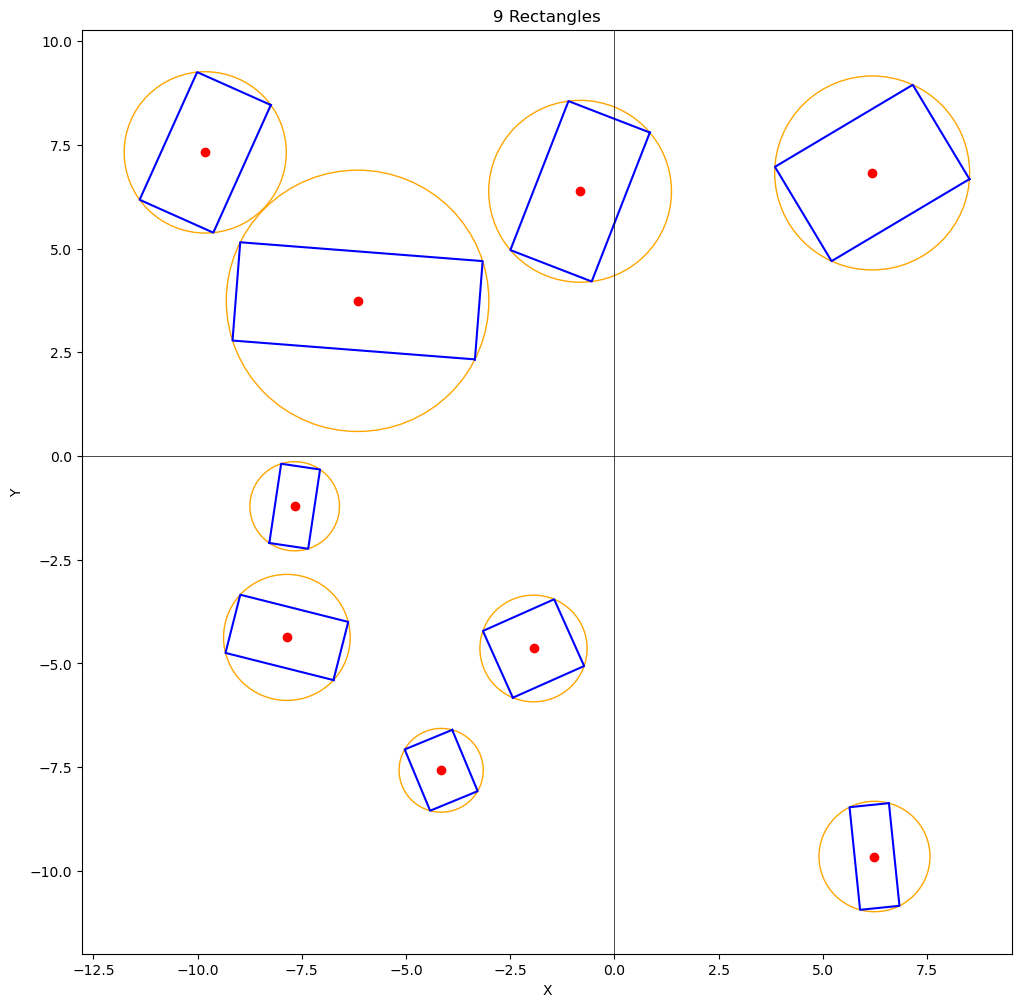

In [2]:
df = pd.read_csv('./cmake-build-debug/rectangles.csv')

fig, ax = plt.subplots(figsize=(12, 12))

for index, row in df.iterrows():
    plt.scatter(row['c_x'], row['c_y'], color='red')

    xs = [row['x1'], row['x2'], row['x3'], row['x4'], row['x1']]
    ys = [row['y1'], row['y2'], row['y3'], row['y4'], row['y1']]
    plt.plot(xs, ys, 'b-')
    
    circle = patches.Circle((row['c_x'], row['c_y']), row['radius'], linewidth=1, edgecolor='orange', facecolor=(0, 0, 0, 0))
    ax.add_patch(circle)

#plottingX and Y axis
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)


plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{df.shape[0]} Rectangles')

plt.axis('equal')
plt.show()


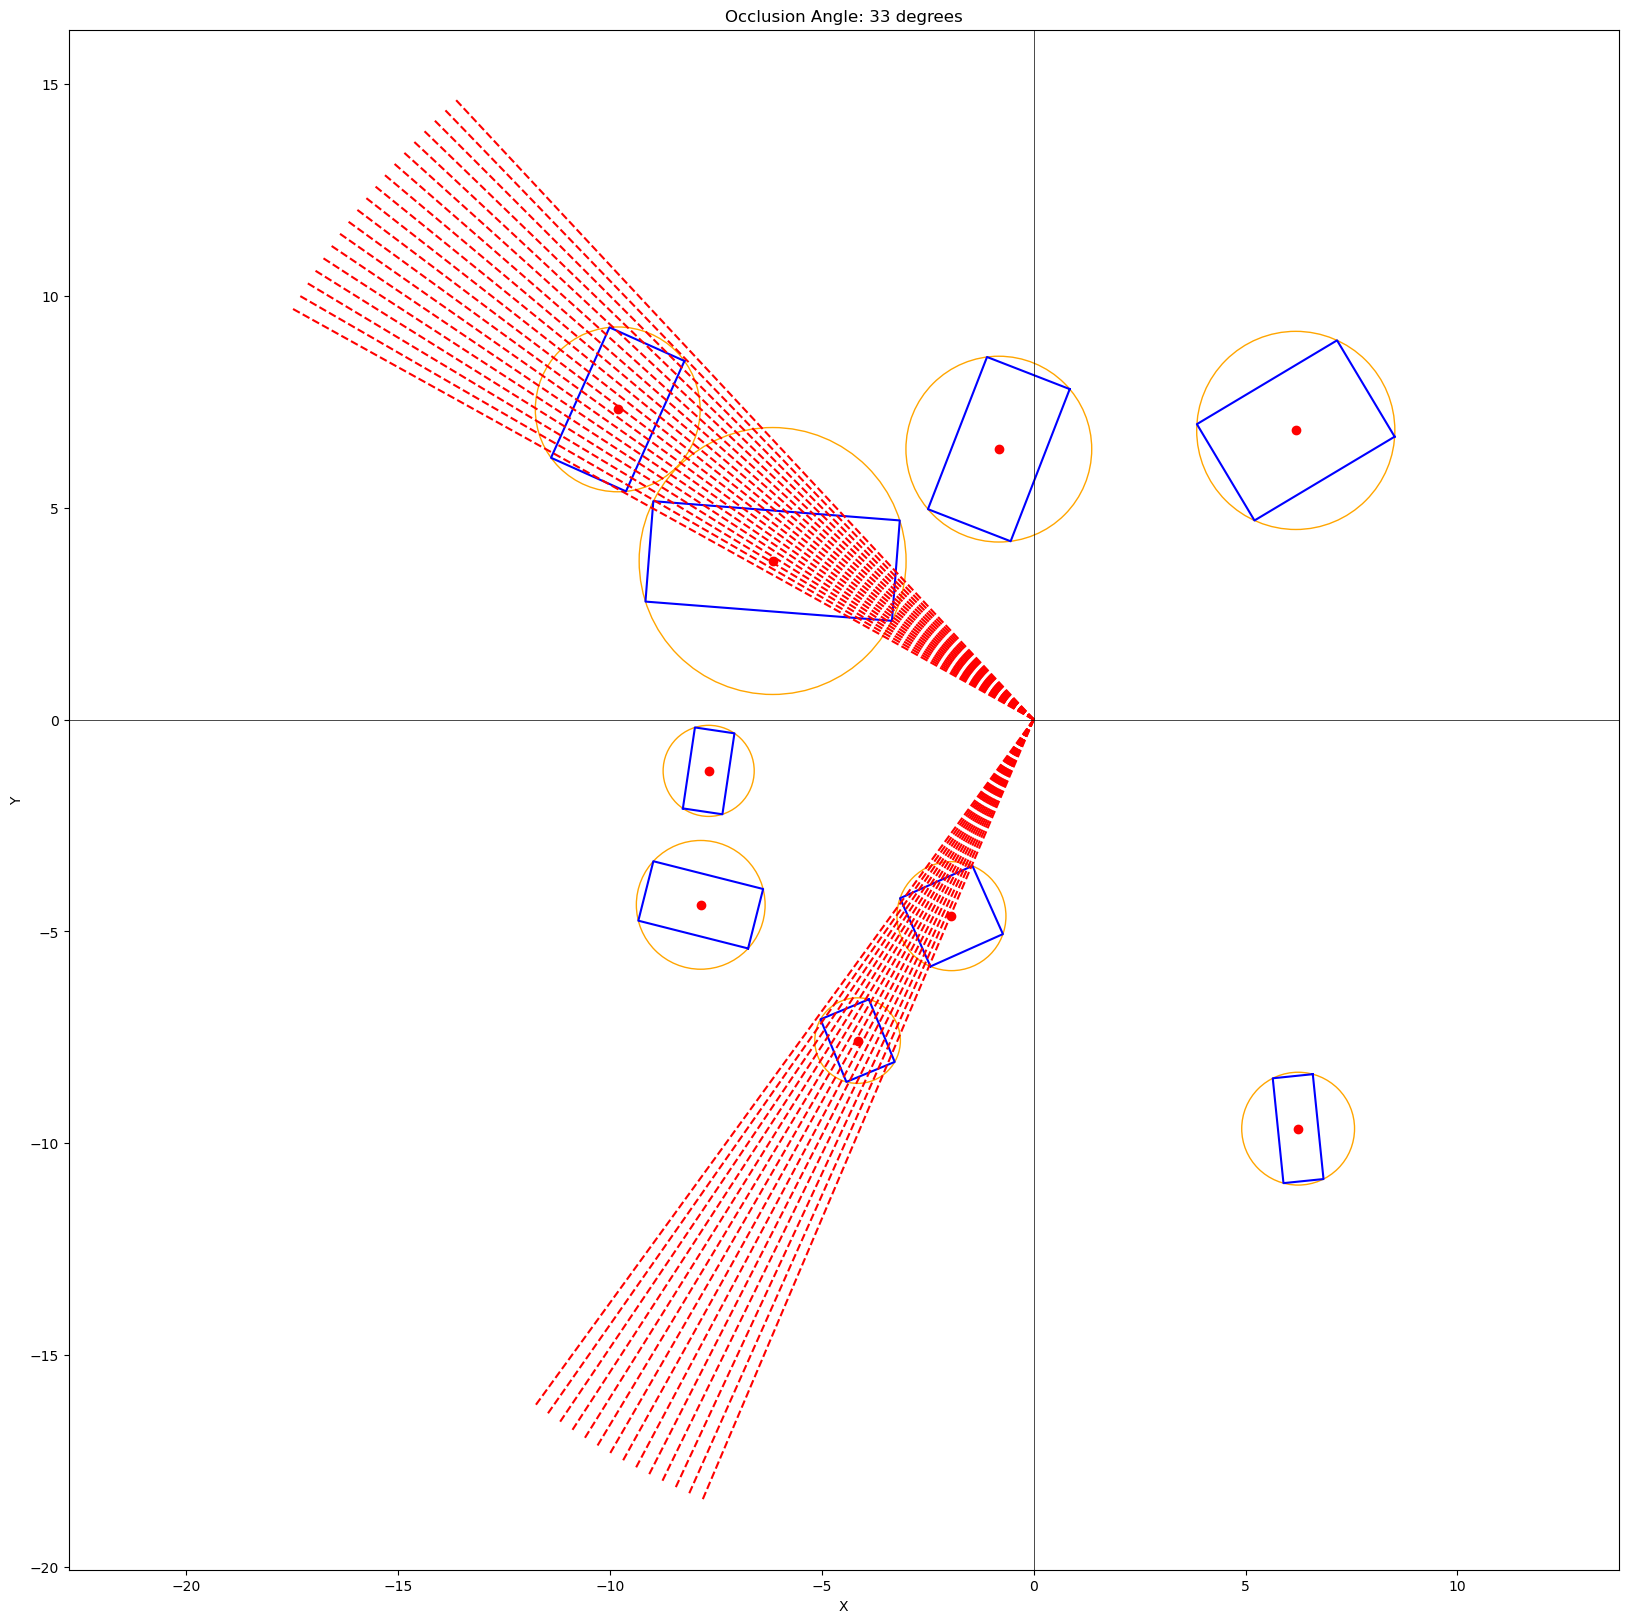

In [3]:
def plot_ray(angle, length=20):
    x_end = length * math.cos(angle)
    y_end = length * math.sin(angle)
    plt.plot([0, x_end], [0, y_end], 'r--')

df = pd.read_csv('./cmake-build-debug/rectangles.csv')
sum_by_column = pd.read_csv('./cmake-build-debug/sum_by_column.csv').values

fig, ax = plt.subplots(figsize=(20, 20))

# plotting rectangles
for index, row in df.iterrows():
    plt.scatter(row['c_x'], row['c_y'], color='red')

    xs = [row['x1'], row['x2'], row['x3'], row['x4'], row['x1']]
    ys = [row['y1'], row['y2'], row['y3'], row['y4'], row['y1']]
    plt.plot(xs, ys, 'b-')
    
    circle = patches.Circle((row['c_x'], row['c_y']), row['radius'], linewidth=1, edgecolor='orange', facecolor=(0, 0, 0, 0))
    ax.add_patch(circle)

#plotting rays for occluded angles
for i, count in enumerate(sum_by_column):
    if count > 1:
        plot_ray(math.radians(i))

# plotting x and y
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Occlusion Angle: {np.sum(sum_by_column > 1)} degrees')

plt.axis('equal')
plt.show()
